In [3]:
!git clone https://github.com/EscVM/Efficient-CapsNet.git

fatal: destination path 'Efficient-CapsNet' already exists and is not an empty directory.


In [4]:
# 현재 작업 디렉토리 확인
!ls

# 클론한 레포지토리로 이동
%cd Efficient-CapsNet

# 레포지토리 내 파일 및 폴더 확인
!ls

Efficient-CapsNet  sample_data
/content/Efficient-CapsNet
bin							      models
config.json						      original_capsnet_test.ipynb
dynamic_visualization_capsules_dimensions_perturbation.ipynb  original_capsnet_train.ipynb
efficient_capsnet_test.ipynb				      README.md
efficient_capsnet_train.ipynb				      requirements.txt
LICENSE							      utils
media


In [5]:
import sys
sys.path.append('/content/Efficient-CapsNet')  # 경로를 Python 경로에 추가

In [6]:
!pip install -r requirements.txt

In [7]:
# TensorFlow와 Addons 호환성을 맞추기 위해 버전 조정
!pip install tensorflow==2.12.0 tensorflow-addons==0.20.0

In [ ]:
# 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [8]:
# 런타임 재시작 후 코드 실행
import tensorflow as tf
from utils import Dataset, plotImages, plotWrongImages, plotHistory
from models import EfficientCapsNet

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [9]:
import tensorflow as tf
print("사용 가능한 GPU:", tf.config.list_physical_devices('GPU'))

사용 가능한 GPU: []


2024-12-06 10:26:35.713681: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

IndexError: list index out of range

In [12]:
# some parameters
model_name = 'MNIST'

In [13]:
dataset = Dataset(model_name, config_path='config.json')

11490434/11490434 [==============================] - 0s 0us/step
[INFO] Dataset loaded!


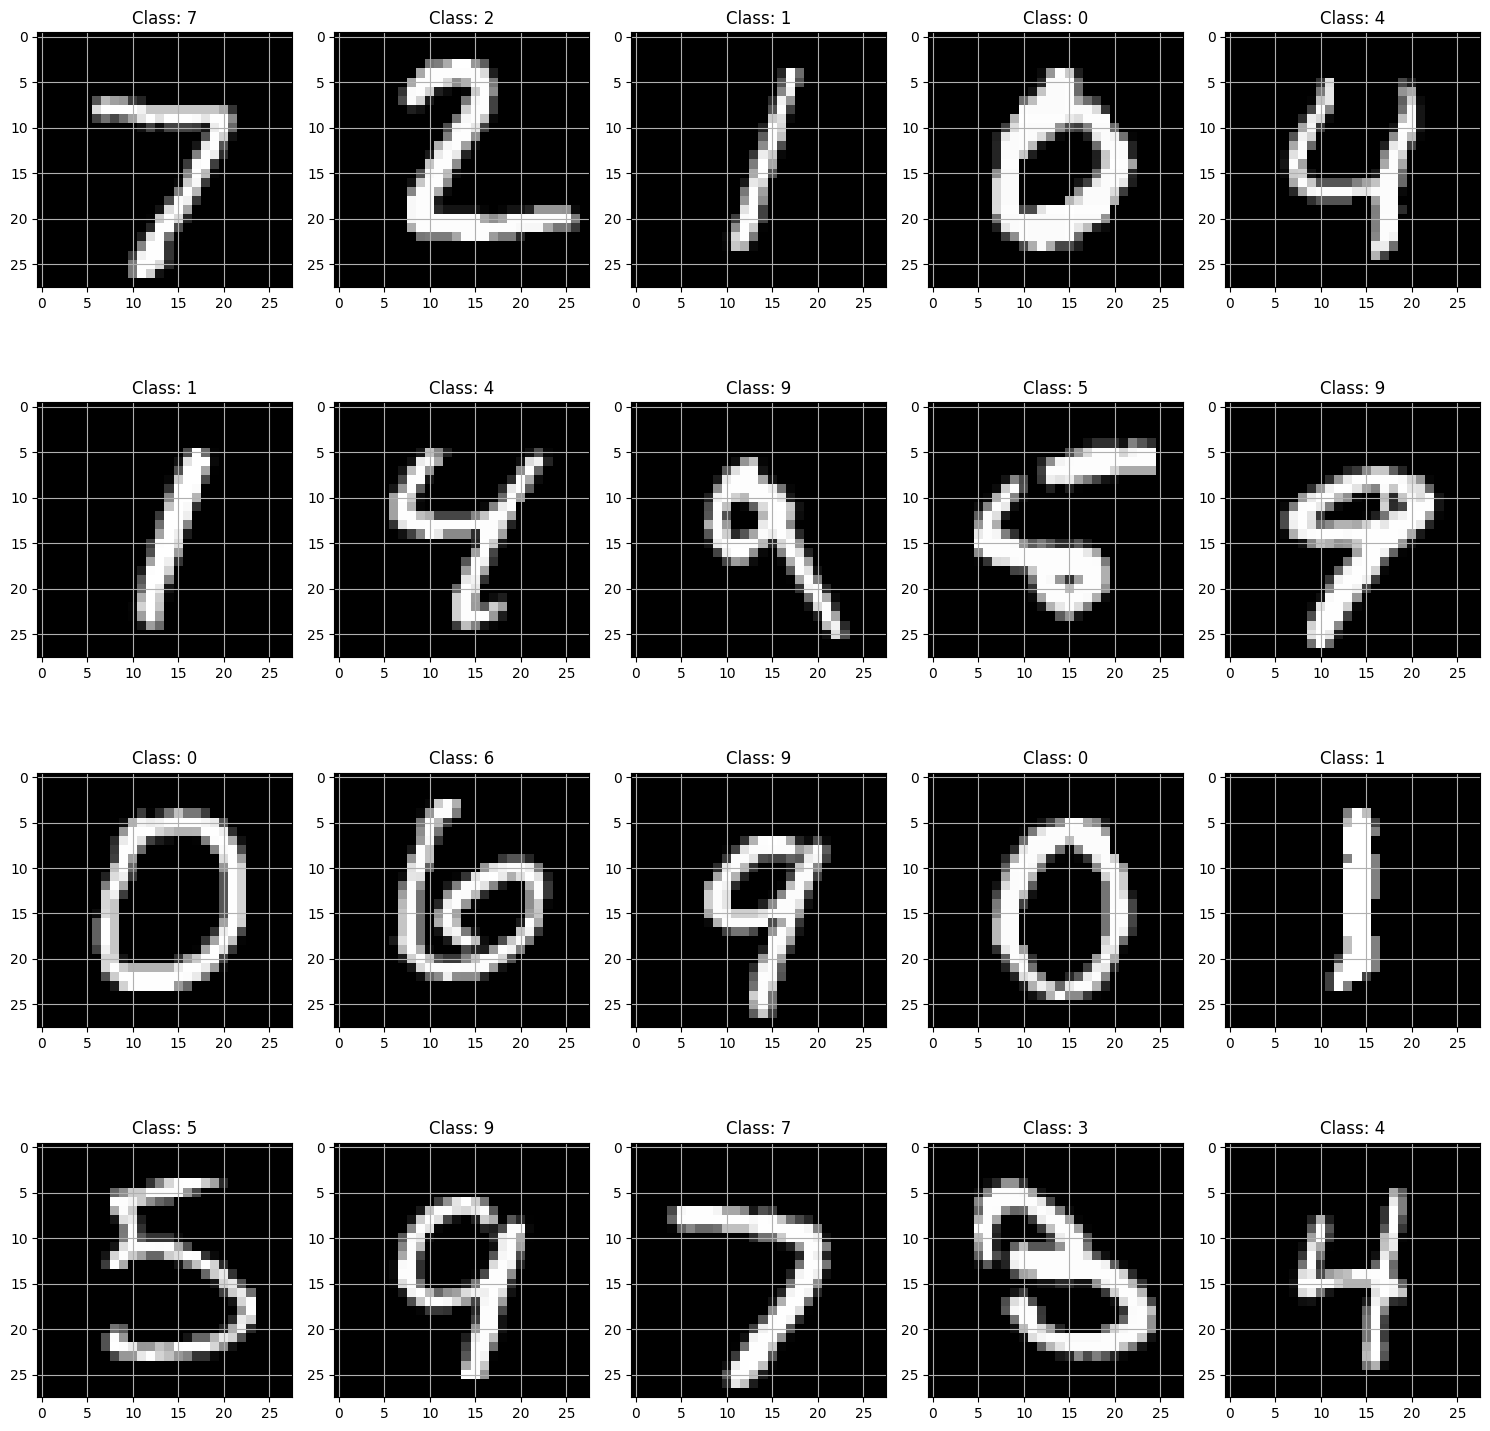

In [14]:
n_images = 20 # number of images to be plotted
plotImages(dataset.X_test[:n_images,...,0], dataset.y_test[:n_images], n_images, dataset.class_names)

In [15]:
model_train = EfficientCapsNet(model_name, mode='train', verbose=True)

Model: "Efficient_CapsNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)  

In [16]:
dataset_train, dataset_val = dataset.get_tf_data()

In [17]:
history = model_train.train(dataset, initial_epoch=0)

------------------------------MNIST train------------------------------


2024-12-06 10:27:58.391158: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [60000,10]
	 [[{{node Placeholder/_1}}]]
2024-12-06 10:27:58.391573: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [60000,28,28,1]
	 [[{{node Placeholder/_0}}]]


Epoch 1/150


2024-12-06 10:28:01.940580: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7912b00a09c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-12-06 10:28:01.940638: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Host, Default Version
2024-12-06 10:28:01.976037: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3750/3750 [==============================] - ETA: 0s - loss: 0.0964 - Efficient_CapsNet_loss: 0.0731 - Generator_loss: 0.0594 - Efficient_CapsNet_accuracy: 0.9294

2024-12-06 10:36:51.396800: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10000,10]
	 [[{{node Placeholder/_1}}]]
2024-12-06 10:36:51.397182: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10000,10]
	 [[{{node Placeholder/_1}}]]



Epoch 1: val_Efficient_CapsNet_accuracy improved from -inf to 0.99080, saving model to bin/efficient_capsnetMNIST_new_train.h5
3750/3750 [==============================] - 538s 142ms/step - loss: 0.0964 - Efficient_CapsNet_loss: 0.0731 - Generator_loss: 0.0594 - Efficient_CapsNet_accuracy: 0.9294 - val_loss: 0.0315 - val_Efficient_CapsNet_loss: 0.0085 - val_Generator_loss: 0.0588 - val_Efficient_CapsNet_accuracy: 0.9908 - lr: 5.0000e-04
Epoch 2/150
3750/3750 [==============================] - ETA: 0s - loss: 0.0427 - Efficient_CapsNet_loss: 0.0216 - Generator_loss: 0.0539 - Efficient_CapsNet_accuracy: 0.9761
Epoch 2: val_Efficient_CapsNet_accuracy improved from 0.99080 to 0.99180, saving model to bin/efficient_capsnetMNIST_new_train.h5
3750/3750 [==============================] - 534s 142ms/step - loss: 0.0427 - Efficient_CapsNet_loss: 0.0216 - Generator_loss: 0.0539 - Efficient_CapsNet_accuracy: 0.9761 - val_loss: 0.0292 - val_Efficient_CapsNet_loss: 0.0077 - val_Generator_loss: 0.05